<a href="https://colab.research.google.com/github/AeyshaAkterPurnia/CVPR/blob/main/Number-detection/mnist_nn_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras.models import load_model
import random
import numpy as np
import cv2

In [2]:
(train_img, train_labels),(test_img, test_labels) = mnist.load_data()
print(f"shape of train images: {train_img.shape}")
print(f"shape of train lables: {train_labels.shape}")
print(f"shape of test images: {test_img.shape}")
print(f"shape of test labels: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape of train images: (60000, 28, 28)
shape of train lables: (60000,)
shape of test images: (10000, 28, 28)
shape of test labels: (10000,)


image in index 0 is '5'


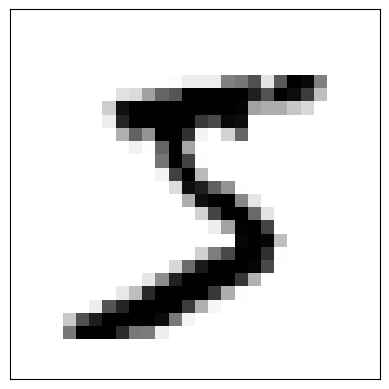

In [3]:
index = 0
img = train_img[index]
plt.imshow(img, cmap='gray_r')
plt.xticks([])
plt.yticks([])
print(f"image in index {index} is '{train_labels[index]}'")

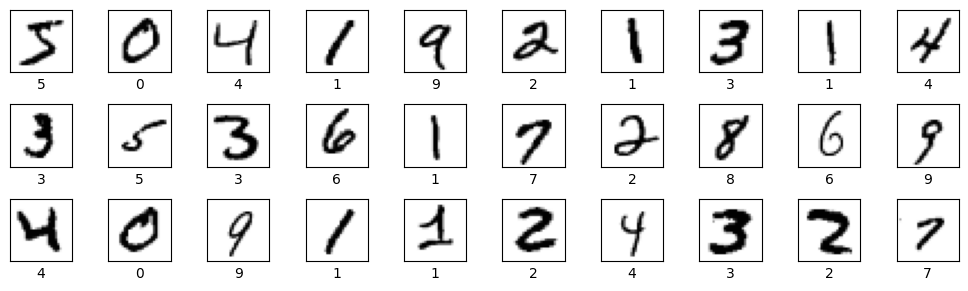

In [4]:
i = 0
plt.figure(figsize = (10,3))
for row in range(3):
    for column in range(10):
        plt.subplot(3, 10, i+1)
        plt.imshow(train_img[i], cmap = plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(train_labels[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
train_img = train_img.reshape(-1, 28*28).astype('float32')/255.0
test_img = test_img.reshape(-1, 28*28).astype('float32')/255.0

image in index 0 is '5'


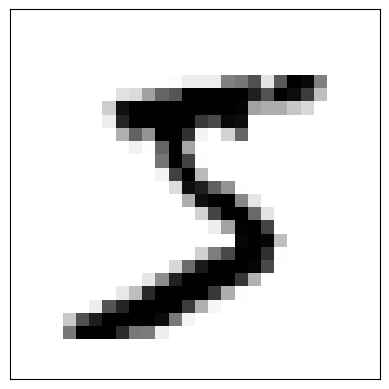

In [6]:
index = 0
img = train_img[index].reshape(28,28)
plt.imshow(img, cmap='gray_r')
plt.xticks([])
plt.yticks([])
print(f"image in index {index} is '{train_labels[index]}'")

In [7]:
model = keras.Sequential([
    keras.Input(shape=((28*28), )),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
tModel = model.fit(train_img, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8345 - loss: 0.5770 - val_accuracy: 0.9576 - val_loss: 0.1425
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9643 - loss: 0.1171 - val_accuracy: 0.9666 - val_loss: 0.1100
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9757 - loss: 0.0775 - val_accuracy: 0.9718 - val_loss: 0.0900
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9848 - loss: 0.0487 - val_accuracy: 0.9699 - val_loss: 0.0982
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9861 - loss: 0.0401 - val_accuracy: 0.9732 - val_loss: 0.0897


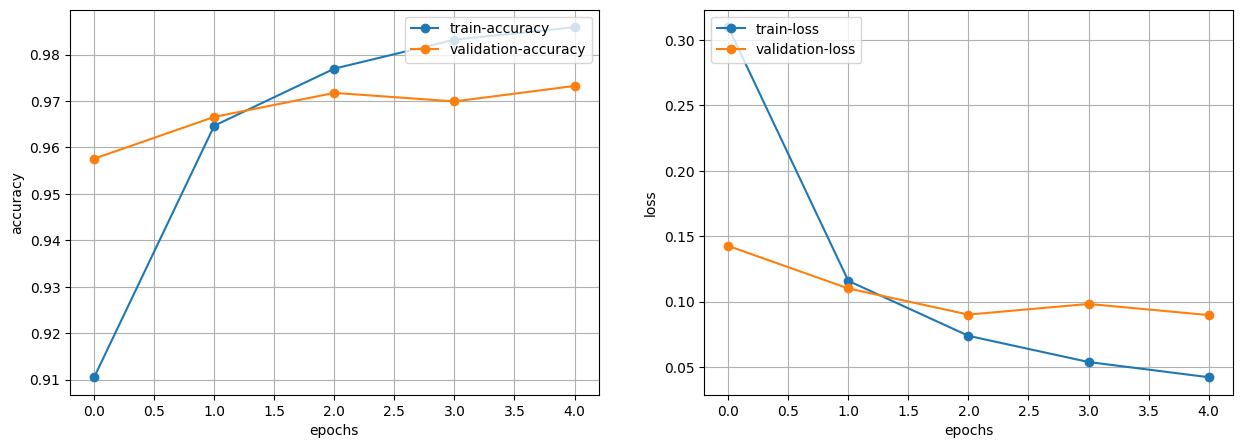

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(tModel.history['accuracy'], 'o-', label='train-accuracy')
plt.plot(tModel.history['val_accuracy'], 'o-', label='validation-accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(tModel.history['loss'], 'o-', label='train-loss')
plt.plot(tModel.history['val_loss'], 'o-', label='validation-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend(loc='upper left')

In [11]:
test_loss, test_accuracy = model.evaluate(test_img, test_labels)
print('\ntest accuracy: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9701 - loss: 0.0977

test accuracy:  0.9717000126838684


In [12]:
predictions = model.predict(test_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


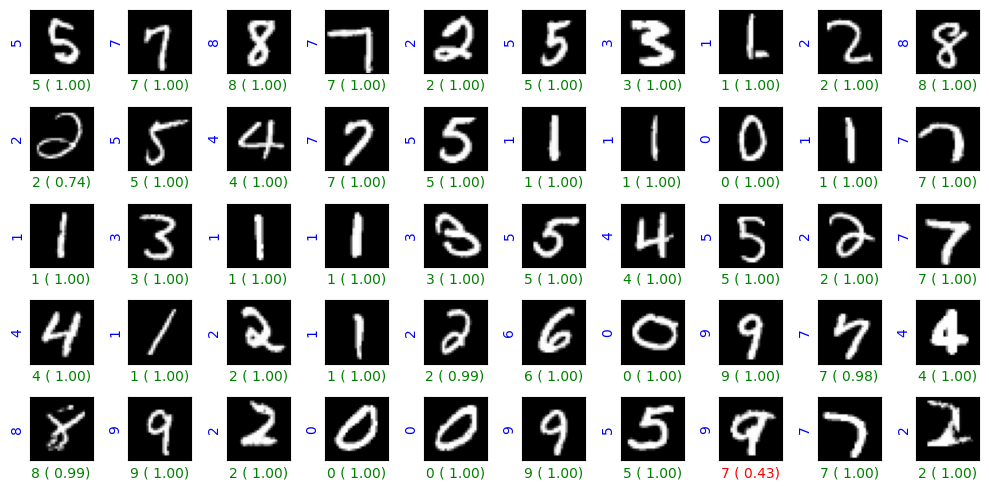

In [13]:
random_indices = random.sample(range(test_img.shape[0]), 5*10)
sample_images = test_img[random_indices, : ]
sample_labels = test_labels[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(10,5))
for rows in range(5):
    for column in range(10):
        plt.subplot(5, 10, i+1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='g')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='b')
        i += 1
plt.tight_layout()
plt.show()

In [14]:
model.save('mnist_nn.keras')

In [ ]:
model = load_model('mnist_nn.keras')

def get_numbers(y_pred):
    # np.argmax gets the index of the highest probability
    digit = np.argmax(y_pred[0])
    probability = round(y_pred[0][digit] * 100, 2)
    return digit, probability

video = cv2.VideoCapture(0)
# 1. Create named windows
cv2.namedWindow("Frame", cv2.WINDOW_NORMAL)
cv2.namedWindow("Binary (Thresh)", cv2.WINDOW_NORMAL)

# 2. Set the desired size (Width, Height)
cv2.resizeWindow("Frame", 400, 300)
cv2.resizeWindow("Binary (Thresh)", 400, 300)

cv2.moveWindow("Frame", 100, 100)
cv2.moveWindow("Binary (Thresh)", 510, 100)

if video.isOpened():
    while True:
        check, img = video.read()
        if not check: break

        img2 = img.copy()
        # Use BGR2GRAY as OpenCV reads webcam in BGR format
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_gau = cv2.GaussianBlur(img_gray, (5, 5), 0)
        ret, thresh = cv2.threshold(img_gau, 80, 255, cv2.THRESH_BINARY_INV)

        kernel = np.ones((5, 5), np.uint8)
        dilation = cv2.dilate(thresh, kernel, iterations=1)
        edged = cv2.Canny(dilation, 50, 250)

        # FIXED: Compatible with OpenCV 4.x+
        contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        num_str = "None" # Default value if no digit is detected

        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            if cv2.contourArea(contour) > 2500:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(img2, (x, y), (x + w, y + h), (255, 255, 255), 3)

                new_img = thresh[y:y + h, x:x + w]
                new_img2 = cv2.resize(new_img, (28, 28))

                # Normalization: MNIST was trained on values 0-1
                im2arr = np.array(new_img2).astype('float32') / 255.0
                im2arr = im2arr.reshape(1, (28*28))

                y_pred = model.predict(im2arr)
                num, per = get_numbers(y_pred)
                num_str = f"[{num}] {per}%"

        # Update display
        y_p = f"prediction: {num_str}"
        cv2.putText(img2, y_p, (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow("Frame", img2)
        cv2.imshow("Binary (Thresh)", thresh)

        key = cv2.waitKey(1)
        if key == 27: # Press ESC to exit
            break

video.release()
cv2.destroyAllWindows()